<a href="https://colab.research.google.com/github/shilpaakula06/AIML-Course-Projects/blob/main/GISMachinelearningwithLandstatData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install geopandas
!pip install pandas 
!pip install  fiona 
!pip install  shapely 
!pip install  pyproj
!pip install  rtree
!pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [52]:
# Loading the datasets

from google.colab import drive
drive.mount('/content/drive/')
selected_basins = gpd.read_file('/content/drive/My Drive/GEOpandas/basins_NLD_south_east_28992.shp')
land_use = gpd.read_file('/content/drive/My Drive/GEOpandas/land_uses_south_east_28992_clipped.shp')
print('basins\' shape = ', selected_basins.shape, 'and land use\'s shape=', land_use.shape)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
basins' shape =  (78, 15) and land use's shape= (5275, 6)


In [53]:
selected_basins.head(3)

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,area_2,geometry
0,2120397730,2121120730,2120022970,2120022970,176.6,176.6,118.9,266.8,232508380100,0,0,2,32780,1.190509e+08,"POLYGON ((199234.514 362951.516, 199207.508 36..."
1,2120382190,2120380720,2120023010,2120023010,171.8,171.8,143.7,158834.7,232610190100,0,0,1,33008,1.438313e+08,"POLYGON ((204116.930 428824.536, 204138.630 42..."
2,2120380720,2120379220,2120023010,2120023010,160.6,160.6,54.6,159159.1,232610175000,0,0,1,33007,5.460733e+07,"POLYGON ((204116.930 428824.536, 203829.823 42..."


In [54]:
land_use.head(3)

,OBJECTID,Code_18,Remark,Area_Ha,ID,geometry
0,594159.0,322,None,53.566880,EU_594159,"POLYGON ((205518.727 353598.084, 205485.164 35..."
1,594162.0,322,None,93.723921,EU_594162,"POLYGON ((206953.571 355198.763, 206935.341 35..."
2,590630.0,312,None,63.511540,EU_590630,"POLYGON ((201384.340 365066.568, 201356.533 36..."


(97687.57765153107, 250854.48597395947, 283920.17548350844, 447392.5477685633)

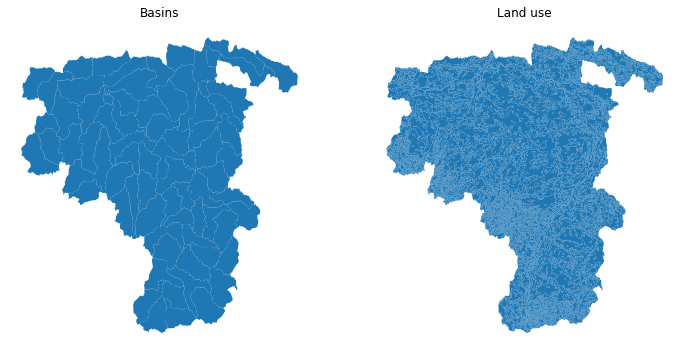

In [55]:
fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(121)
plt.title('Basins')
selected_basins.plot(ax=ax1)
plt.axis('off')

ax2 = plt.subplot(122)
plt.title('Land use')
land_use.plot(ax=ax2)
plt.axis('off')

In [56]:
land_use_cat = land_use.dissolve(by='Code_18')
land_use_cat.reset_index(inplace=True)
land_use_cat.shape

(28, 6)

In [57]:
land_use_cat.head()

,Code_18,geometry,OBJECTID,Remark,Area_Ha,ID
0,111,"MULTIPOLYGON (((168575.778 294664.848, 168600....",1569723.0,None,34.560728,EU_1569723
1,112,"MULTIPOLYGON (((134827.957 356078.152, 134850....",544255.0,None,75.276047,EU_544255
2,121,"MULTIPOLYGON (((134498.970 359333.317, 134559....",546812.0,None,243.986901,EU_546812
3,122,"MULTIPOLYGON (((156510.345 360532.047, 156509....",547704.0,None,33.911562,EU_547704
4,123,"MULTIPOLYGON (((173166.435 296289.060, 173017....",547802.0,None,50.065668,EU_547802


In [58]:

import regex

land_use_cat['category'] = land_use_cat['Code_18']
categories = ['A','B', 'C','D','E']
values = [1, 2, 3, 4, 5]
for i,j in zip(categories, values):
    land_use_cat['category'].replace(str(j)+'\d{2}', i,regex=True, inplace = True)

(97687.57765153106, 250854.48597395944, 283920.1754835084, 447392.54776856326)

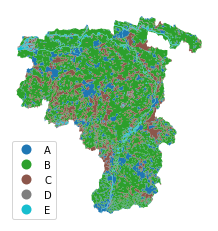

In [59]:
land_use_cat_dis = land_use_cat.dissolve(by='category')
land_use_cat_dis.reset_index(inplace=True)

land_use_cat_dis.plot(column='category', categorical=True, legend=True, legend_kwds={'loc': 'lower left'})
plt.axis('off')

In [60]:
selected_basins = selected_basins[['HYBAS_ID', 'geometry']]
selected_basins.head()

,HYBAS_ID,geometry
0,2120397730,"POLYGON ((199234.514 362951.516, 199207.508 36..."
1,2120382190,"POLYGON ((204116.930 428824.536, 204138.630 42..."
2,2120380720,"POLYGON ((204116.930 428824.536, 203829.823 42..."
3,2120380600,"POLYGON ((197737.151 436183.441, 197163.783 43..."
4,2121115520,"POLYGON ((199042.504 418114.903, 199001.176 41..."


In [61]:
land_use_cat_dis.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [62]:
selected_basins.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [63]:
dicts = {}
cat_names = ['A', 'B', 'C', 'D', 'E']

for key in cat_names:
    value = land_use_cat_dis.loc[land_use_cat_dis.category==key]
    value = value.to_crs(epsg='28992')
    dicts[key] = value

In [ ]:
cat_2d_table = np.zeros((selected_basins.shape[0],6))
# iterate through basins
for idx, i in enumerate(selected_basins.iterrows()):
    gdf_i = gpd.GeoDataFrame(pd.DataFrame(i[1:], columns =selected_basins.columns))
    gdf_i = gdf_i.set_crs(epsg=28992, inplace=True)
    # iterate through the five different land-use categories
    for number, key in enumerate(cat_names):
        clipped = gpd.clip(dicts[key], gdf_i)
        area = gpd.clip(dicts[key], gdf_i).area.values
        cat_2d_table[idx, number] = area[0] if area.size != 0 else 0
        cat_2d_table[idx, 5] = gdf_i.HYBAS_ID

In [65]:
cat_2d_table_df = pd.DataFrame(cat_2d_table, columns=['cat_A', 'cat_B', 'cat_C', 'cat_D', 'cat_E', 'HYBAS_ID'])
cat_2d_table_df['area'] = selected_basins['geometry'].area
cat_2d_table_df.head()

,cat_A,cat_B,cat_C,cat_D,cat_E,HYBAS_ID,area
0,0.0,0.0,0.0,0.0,0.0,0.0,1.193661e+08
1,0.0,0.0,0.0,0.0,0.0,0.0,1.442357e+08
2,0.0,0.0,0.0,0.0,0.0,0.0,5.476063e+07
3,0.0,0.0,0.0,0.0,0.0,0.0,1.691356e+08
4,0.0,0.0,0.0,0.0,0.0,0.0,1.361143e+08


In [66]:
percent_names = ['perc_cat_A', 'perc_cat_B', 'perc_cat_C', 'perc_cat_D', 'perc_cat_E']
for i,j in zip(cat_2d_table_df.columns[:-2], percent_names):
    cat_2d_table_df[j] = cat_2d_table_df[i] / cat_2d_table_df.area
cat_2d_table_df.drop(['cat_A', 'cat_B', 'cat_C', 'cat_D', 'cat_E'], axis=1, inplace=True)
cat_2d_table_df['HYBAS_ID'] = cat_2d_table_df.HYBAS_ID.astype('int').astype('str')
cat_2d_table_df.drop(columns=['area'], inplace=True)
cat_2d_table_df.head()

,HYBAS_ID,perc_cat_A,perc_cat_B,perc_cat_C,perc_cat_D,perc_cat_E
0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0
